# Proprocessing & Feature Engineering

In [1]:
pd.options.display.max_columns = 300

%matplotlib inline

## 1. Feature/Data Transformation

In [2]:
df_train = pd.read_csv('./data/train.csv', parse_dates=['timestamp'])
df_test = pd.read_csv('./data/test.csv', parse_dates=['timestamp'])

## outlier & clean data

In [3]:
## clean data
# check life_sq > full_sq -> change np.NaN
bad_index = df_train[df_train.life_sq > df_train.full_sq].index
df_train.loc[bad_index, "life_sq"] = np.NaN
bad_index = df_test[df_test.life_sq > df_test.full_sq].index
df_test.loc[bad_index, "life_sq"] = np.NaN
bad_index = df_train[df_train.life_sq < 5].index
df_train.loc[bad_index, "life_sq"] = np.NaN
bad_index = df_test[df_test.life_sq < 5].index
df_test.loc[bad_index, "life_sq"] = np.NaN
bad_index = df_train[df_train.full_sq < 5].index
df_train.loc[bad_index, "full_sq"] = np.NaN
bad_index = df_test[df_test.full_sq < 5].index
df_test.loc[bad_index, "full_sq"] = np.NaN
bad_index = df_train[df_train.kitch_sq >= df_train.life_sq].index
df_train.loc[bad_index, "kitch_sq"] = np.NaN
bad_index = df_test[df_test.kitch_sq >= df_test.life_sq].index
df_test.loc[bad_index, "kitch_sq"] = np.NaN
bad_index = df_train[(df_train.kitch_sq == 0).values + (df_train.kitch_sq == 1).values].index
df_train.loc[bad_index, "kitch_sq"] = np.NaN
bad_index = df_test[(df_test.kitch_sq == 0).values + (df_test.kitch_sq == 1).values].index
df_test.loc[bad_index, "kitch_sq"] = np.NaN
bad_index = df_train[(df_train.full_sq > 210) & (df_train.life_sq / df_train.full_sq < 0.3)].index
df_train.loc[bad_index, "full_sq"] = np.NaN
bad_index = df_test[(df_test.full_sq > 200) & (df_test.life_sq / df_test.full_sq < 0.3)].index
df_test.loc[bad_index, "full_sq"] = np.NaN
df_train.loc[[13117], "build_year"] = df_train.loc[[13117], "kitch_sq"]

## outlier
# brings error down a lot by removing extreme price per sqm
df_train.loc[df_train.state == 33, 'state'] = 3
df_train.loc[df_train['life_sq'] > 1000, 'life_sq'] = np.median(df_train['life_sq'].dropna())
df_train.loc[df_train['kitch_sq'] > 250, 'kitch_sq'] = np.median(df_train['kitch_sq'].dropna())
df_train.loc[df_train['num_room'] > 6, 'num_room'] = np.median(df_train['num_room'].dropna())
df_train.loc[df_train['floor'] > 50, 'floor'] = np.median(df_train['floor'].dropna())
df_train.loc[df_train['max_floor'] > 60, 'max_floor'] = np.median(df_train['max_floor'].dropna())
df_train.loc[df_train.full_sq == 0, 'full_sq'] = 50
df_train = df_train[df_train.price_doc/df_train.full_sq <= 600000]
df_train = df_train[df_train.price_doc/df_train.full_sq >= 10000]



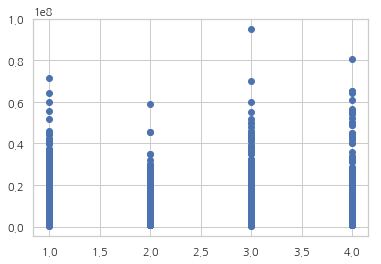

In [4]:
# state -> 나중에 카테고리로 변경할 수 있음!!!!!!!
plt.scatter(df_train.state, df_train.price_doc)

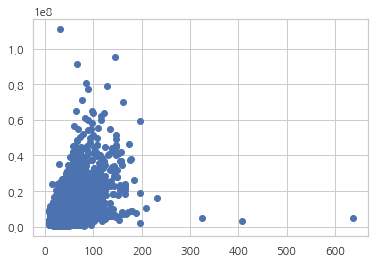

In [5]:
plt.scatter(df_train.life_sq, df_train.price_doc)

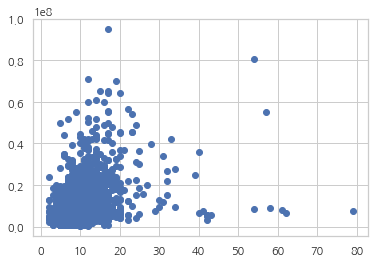

In [6]:
plt.scatter(df_train.kitch_sq, df_train.price_doc)

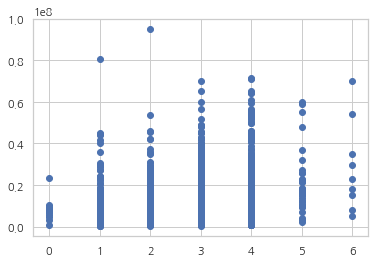

In [7]:
# num_room -> 나중에 카테고리로 변경할 수 있음!!!!!!!
plt.scatter(df_train.num_room, df_train.price_doc)

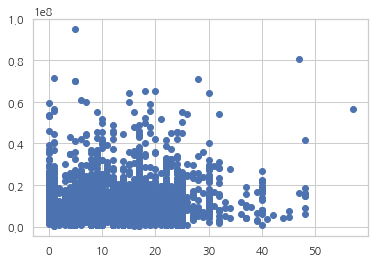

In [19]:
plt.scatter(df_train.max_floor, df_train.price_doc)

In [17]:
df_train.loc[df_train['max_floor'] > 60]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [18]:
df_train.loc[df_train['max_floor'] > 60, 'max_floor'] = np.median(df_train['max_floor'].dropna())

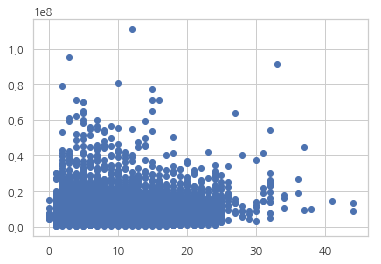

In [15]:
plt.scatter(df_train.floor, df_train.price_doc)

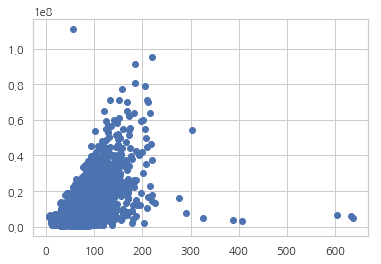

In [20]:
plt.scatter(df_train.full_sq, df_train.price_doc)

In [22]:
df_train.loc[df_train.full_sq == 0]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [11]:
df_train['floor'].max()

77.0

In [13]:
df_train.loc[df_train.floor > 50]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [14]:
df_train.loc[df_train['floor'] > 50, 'floor'] = np.median(df_train['floor'].dropna())

In [ ]:
df_train.loc[df_train['build_year'] < 1800, 'build_year'] = np.median(df_train['num_room'].dropna())

In [ ]:
df_train.loc[df_train['num_room'] > 6, 'num_room'] = np.median(df_train['num_room'].dropna())

In [ ]:
train.loc[df_train['kitch_sq'] > 250]

In [ ]:
df_train.loc[df_train['kitch_sq'] > 250, 'kitch_sq'] = np.median(df_train['kitch_sq'].dropna())

In [ ]:
df_train.loc[df_train['life_sq'] > 1000, 'life_sq'] = np.median(df_train['life_sq'].dropna())

In [ ]:
np.median(df_train['life_sq'])

In [ ]:
df_train.loc[df_train.state == 33, 'state'] = 3

In [ ]:
df_train.loc[df_train.state == 33]

In [ ]:
df_train[(df_train.full_sq > 210) & (df_train.life_sq / df_train.full_sq < 0.3)].index

In [ ]:
df_train.loc[[1478]]

In [ ]:
df_train[df_train.life_sq > 300].index

In [ ]:
df_train.loc[[128]]

In [ ]:
bad_index = df_train[df_train.kitch_sq >= df_train.life_sq].index
df_train.loc[bad_index, "kitch_sq"] = np.NaN
bad_index = df_test[df_test.kitch_sq >= df_test.life_sq].index
df_test.loc[bad_index, "kitch_sq"] = np.NaN
bad_index = df_train[(df_train.kitch_sq == 0).values + (df_train.kitch_sq == 1).values].index
df_train.loc[bad_index, "kitch_sq"] = np.NaN
bad_index = df_test[(df_test.kitch_sq == 0).values + (df_test.kitch_sq == 1).values].index
df_test.loc[bad_index, "kitch_sq"] = np.NaN

In [ ]:
df_train.loc[[13117], "build_year"]

In [ ]:
df_train.loc[[13117]]

In [ ]:
df_train.loc[df_train.index[[2118]], 'price_doc']

In [ ]:
df_train.loc[df_train.index[[2121]], 'price_doc']

In [ ]:
# select by index
df_train.iloc[['2118']]

In [ ]:
# select by index
df_train.iloc[['2121']]

In [ ]:
df_train = df_train.drop([2118]) 

In [ ]:
# Drop data with extremely big price #
df_train = df_train.drop([2121]) 

In [ ]:
# Check price outlier
sns.boxplot(x=df_train['price_doc'])

In [ ]:
sns.scatterplot(x="num_room", y="price_doc", data=df_train)

In [ ]:
df_train['full_sq'].idxmax() 

In [ ]:
df_train.iloc[['3527']]

In [ ]:
# price outlier 확인
plt.scatter(range(df_train.shape[0]), np.sort(df_train.price_doc.values))
plt.title("Price with outliers present",fontsize = 18)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

In [ ]:
# Cut out bottom and top 1% of price data
price_low = np.percentile(df_train['price_doc'], 1)
price_high = np.percentile(df_train['price_doc'], 99)
        
# cut out the defined range above from the dataframe
df_train = df_train.drop(df_train[df_train['price_doc'] < price_low].index)
df_train = df_train.drop(df_train[df_train['price_doc'] > price_high].index)

plt.scatter(range(df_train.shape[0]), np.sort(df_train.price_doc.values))
plt.title("Price with outliers present",fontsize = 18)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

In [ ]:
def price_histogram():
    fig,ax = plt.subplots(1,2, figsize=(20,8))
    ax1,ax2 = ax.flatten()

    df_train.price_doc.plot.hist(bins=20, color='Purple', edgecolor='black', ax=ax1);
    ax1.set_title('Price Histograms', fontsize=17)
    ax1.set_ylabel('')
    ax1.set_xlabel('')

    log_price = np.log(df_train.price_doc)
    sns.distplot(log_price,  bins=30, color='tomato', kde=True, ax=ax2)
    ax2.set_title("Price Distribution Histogram", fontsize=17)
    ax2.set_ylabel("")
    ax2.set_xlabel('')
    plt.subplots_adjust(wspace=0.2);

price_histogram()

In [ ]:
df_train['num_room'].sort()

In [ ]:
df_train['full_sq'].max()

In [ ]:
df_train.loc[df_train['full_sq']== 5326]

In [ ]:
df_train.loc[df_train['full_sq']== 0]

In [ ]:
corrs = sorted([(df_train['price_doc'].corr(df_train[f]), f) for f in df_train._get_numeric_data().columns.drop('price_doc')], reverse=True)
features = [f[1] for f in corrs]

for f in features:
    fig  = plt.figure(figsize=(9, 3), dpi=100)
    fig.suptitle("{}'s distribution and regression with price_doc".format(f))

    axes1 = fig.add_subplot(121)
    axes2 = fig.add_subplot(122) 
    sns.distplot(df_train[f].dropna(), ax=axes1)
    sns.regplot(x=f, y='price_doc', data=df_train[[f, 'price_doc']], ax=axes2, scatter_kws={"s": 10, "color":"b"}, line_kws={"color":"r"})
    fig.tight_layout()
    plt.show()